In [194]:
bucket = 'restaurantrec4'
prefix = 'sagemaker/feedme4'
 
# Define IAM role
import boto3
import re
from sagemaker import get_execution_role

role = 'arn:aws:iam::785650604181:role/austimable4'

In [135]:
!wget --no-check-certificate 'https://drive.google.com/a/vanderbilt.edu/uc?authuser=1&id=1iuunb6ydpH_tc4AJDkvAUwpCVDGbebaA&export=download' -O test.csv 

--2018-12-14 06:43:26--  https://drive.google.com/a/vanderbilt.edu/uc?authuser=1&id=1iuunb6ydpH_tc4AJDkvAUwpCVDGbebaA&export=download
Resolving drive.google.com (drive.google.com)... 172.217.9.78, 2607:f8b0:4009:806::200e
Connecting to drive.google.com (drive.google.com)|172.217.9.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/a/vanderbilt.edu/uc?id=1iuunb6ydpH_tc4AJDkvAUwpCVDGbebaA&export=download [following]
--2018-12-14 06:43:26--  https://drive.google.com/a/vanderbilt.edu/uc?id=1iuunb6ydpH_tc4AJDkvAUwpCVDGbebaA&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/btu87pcrel3l4h314buif49u0g1uiapu/1544767200000/01821918796605301728/*/1iuunb6ydpH_tc4AJDkvAUwpCVDGbebaA?e=download [following]
--2018-12-14 06:43:26--  https://doc-0k-3g-docs

In [136]:
!wget --no-check-certificate 'https://drive.google.com/a/vanderbilt.edu/uc?authuser=1&id=19TsUMnCKpvkGeG71D8ca8eOJ8MOFWdB5&export=download' -O training.csv

--2018-12-14 06:43:30--  https://drive.google.com/a/vanderbilt.edu/uc?authuser=1&id=19TsUMnCKpvkGeG71D8ca8eOJ8MOFWdB5&export=download
Resolving drive.google.com (drive.google.com)... 172.217.9.78, 2607:f8b0:4009:806::200e
Connecting to drive.google.com (drive.google.com)|172.217.9.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/a/vanderbilt.edu/uc?id=19TsUMnCKpvkGeG71D8ca8eOJ8MOFWdB5&export=download [following]
--2018-12-14 06:43:30--  https://drive.google.com/a/vanderbilt.edu/uc?id=19TsUMnCKpvkGeG71D8ca8eOJ8MOFWdB5&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5000v22lqvfcdgeq0uaqtl8u9bn0kdjp/1544767200000/01821918796605301728/*/19TsUMnCKpvkGeG71D8ca8eOJ8MOFWdB5?e=download [following]
--2018-12-14 06:43:32--  https://doc-0c-3g-docs

In [137]:
!head -10 test.csv

user_id	business_id	stars	date
i0jgrH26hFHyB_SXBq6oTQ	eJCDUkFa7wl-BHYKZzaTMQ	2	2011-02-13
UrZSYgSCmBRtGxXjNxV3Ug	KTjfQxsQDKWP0dWXBCyXuA	2	2013-08-15
SbbcXsw9OSUimS3pNM3Vvw	8hZjiPzJIojA1k7_W4hELA	5	2017-07-28
4ZecK0IVM-5_E5-wczXqZg	EbP8eduNl-aEy2UVfs3zJA	5	2011-11-08
BI4jBJVto2tEQ0NiaR0rNQ	IZivKqtHyz4-ts8KsnvMrA	4	2014-12-18
3rjrJsPyufxNUmje0r6-_Q	OaHfq01gm8PTYkJ36k1feg	2	2018-03-18
IU9Q7CEDW1K0oPB6ZTTlWQ	03hgFWEcDg205hOCnswwiQ	4	2008-12-19
Dta3BoT4P8nlAxF4lNXG0g	MwCai0x6GILtK4KkwufZig	5	2012-02-03
wcfUv4PT00KXhN8pGGfaPA	PwpSY0vO3XlQXKOuqiqZMQ	1	2013-03-29


In [138]:
!head training.csv

user_id	business_id	stars	date
a8hXNaWtsoFw-h_3M2u26Q	NnV0LkIs5YjUSPzAP1nWXQ	2	2018-05-19
jFt0UjI-GayZq0IPyrCLhw	0EgYXYjt2XJL4hlsKnzrcw	5	2016-07-10
USoDds58VsEJXyVmfp7kBg	loSgYD9dHOsjjm7QCly5qw	2	2011-02-26
yPVUOv56zrYlpP7wJpJJWg	Yiw2jUJzUdFmglHZgj4RaQ	3	2014-06-19
tK-tFNjP5NvbvgBgQQ5S9Q	-ed0Yc9on37RoIoG2ZgxBA	5	2015-09-23
oQNd0VnOg7o5sP-7W4h1sg	Gh1BoQNMGkh91pSHqvDRAA	4	2017-01-08
wt57fkTOcSCYNb2fNAOlyg	NFMD_-wFrbfdhTcdHPDCZQ	5	2015-11-20
Wa5Sd_JuK4ws6CXNw_yDAg	YILyHegzhy1vlc_LNVfObw	3	2017-03-12
UKv5imCvBbxEeGFlphx8pQ	KaGZE0_o1EmmSN4Fo_cpUw	2	2014-10-08


In [139]:
import pandas as pd
data = pd.read_csv("training.csv", sep='\t')
data2 = pd.read_csv("test.csv", sep='\t')

nbUsers = pd.concat([data, data2])['user_id'].nunique()
nbBusinesses = pd.concat([data, data2])['business_id'].nunique()
nbFeatures = nbUsers + nbBusinesses
print("Number of Users: %d" % nbUsers)
print("Number of Businesses: %d" % nbBusinesses)
print("Number of Features: %d" % nbFeatures)
print(len(data))
print(len(data2))

Number of Users: 243372
Number of Businesses: 4476
Number of Features: 247848
400000
100000


In [140]:
convertTrainUsers = dict([(y,x+1) for x,y in enumerate(sorted(set(data['user_id']).union(set(data2['user_id']))), start=0)])
      
convertTrainBusinesses = dict([(y,x+1) for x,y in enumerate(sorted(set(data['business_id']).union(set(data2['business_id']))), start=0)])

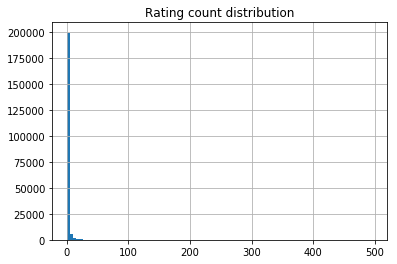

In [142]:
businesses_by_user = data.groupby('user_id')
res = businesses_by_user['business_id'].count().hist(bins=100)
res.set_title('Rating count distribution')
res

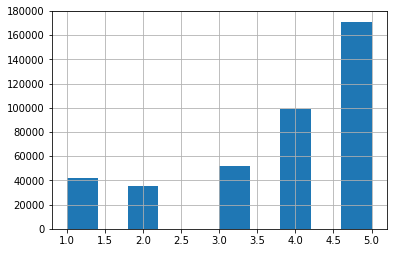

In [143]:
data['stars'].hist()

In [144]:
nbRatingsTrain = 400000
nbRatingsTest = 100000

In [146]:
def loadDataset(filename, usersDict, businessesDict, lines, columns):
    # Features are one-hot encoded in a sparse matrix
    X = lil_matrix((lines, columns)).astype('float32')
    # Labels are stored in a vector
    Y = []
    line = 0
    with open(filename, 'r') as f:
        samples = csv.DictReader(f, delimiter = '\t')
        for row in samples:
            user_id = row["user_id"]
            business_id = row["business_id"]
            stars = row["stars"] 
            date = row["date"]
            X[line, usersDict[user_id] - 1] = 1
            X[line, int(nbUsers) + businessesDict[business_id] - 1] = 1
            if int(stars) >= 4:
                Y.append(1)
            else:
                Y.append(0)
            line = line + 1
            
    Y = np.array(Y).astype('float32')
    return X, Y

In [147]:
X_train, Y_train = loadDataset('training.csv', 
    convertTrainUsers, convertTrainBusinesses, nbRatingsTrain, nbFeatures)
X_test, Y_test = loadDataset('test.csv', 
    convertTrainUsers, convertTrainBusinesses, nbRatingsTest, nbFeatures)

In [149]:
print(X_train.shape)
print(Y_train.shape)
assert X_train.shape == (nbRatingsTrain, nbFeatures)
assert Y_train.shape == (nbRatingsTrain, )
zero_labels = np.count_nonzero(Y_train)
print("Training labels: %d zeros, %d ones" % (zero_labels, nbRatingsTrain-zero_labels))

print(X_test.shape)
print(Y_test.shape)
assert X_test.shape  == (nbRatingsTest, nbFeatures)
assert Y_test.shape  == (nbRatingsTest, )
zero_labels = np.count_nonzero(Y_test)
print("Test labels: %d zeros, %d ones" % (zero_labels, nbRatingsTest-zero_labels))

(400000, 247848)
(400000,)
Training labels: 270619 zeros, 129381 ones
(100000, 247848)
(100000,)
Test labels: 67667 zeros, 32333 ones


In [150]:
train_key      = 'train.protobuf'
train_prefix   = '{}/{}'.format(prefix, 'train')

test_key       = 'test.protobuf'
test_prefix    = '{}/{}'.format(prefix, 'test')

output_location  = 's3://{}/{}/output'.format(bucket, prefix)

In [151]:
import sagemaker.amazon.common as smac
import io

def writeDatasetToProtobuf(X, Y, bucket, prefix, key):
    buf = io.BytesIO()
    smac.write_spmatrix_to_sparse_tensor(buf, X, Y)
    buf.seek(0)
    obj = '{}/{}'.format(prefix, key)
    boto3.resource('s3').Bucket(bucket).Object(obj).upload_fileobj(buf)
    return 's3://{}/{}'.format(bucket,obj)
    
train_data = writeDatasetToProtobuf(X_train, Y_train, bucket, train_prefix, train_key)    
test_data  = writeDatasetToProtobuf(X_test, Y_test, bucket, test_prefix, test_key)    

print('uploaded training data location: {}'.format(train_data))
print('uploaded test data location: {}'.format(test_data))
print('training artifacts will be uploaded to: {}'.format(output_location))

uploaded training data location: s3://restaurantrec4/sagemaker/feedme4/train/train.protobuf
uploaded test data location: s3://restaurantrec4/sagemaker/feedme4/test/test.protobuf
training artifacts will be uploaded to: s3://restaurantrec4/sagemaker/feedme4/output


In [152]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'factorization-machines')

In [153]:
import sagemaker

sess = sagemaker.Session()

fm = sagemaker.estimator.Estimator(container,
                                   role, 
                                   train_instance_count=1, 
                                   train_instance_type='ml.m4.xlarge',
                                   output_path=output_location,
                                   sagemaker_session=sess)

fm.set_hyperparameters(feature_dim=nbFeatures,
                      predictor_type='binary_classifier',
                      mini_batch_size=1000,
                      num_factors=64,
                      epochs=100)

fm.fit({'train': train_data, 'test': test_data})

INFO:sagemaker:Creating training-job with name: factorization-machines-2018-12-14-06-45-48-339


2018-12-14 06:45:48 Starting - Starting the training job...
2018-12-14 06:45:52 Starting - Launching requested ML instances......
2018-12-14 06:46:50 Starting - Preparing the instances for training...
2018-12-14 06:47:37 Downloading - Downloading input data
2018-12-14 06:47:37 Training - Downloading the training image.....
Docker entrypoint called with argument(s): train
[12/14/2018 06:48:25 INFO 140362281232192] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'factors_lr': u'0.0001', u'linear_init_sigma': u'0.01', u'epochs': 1, u'_wd': u'1.0', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'factors_init_sigma': u'0.001', u'_log_level': u'info', u'bias_init_method': u'normal', u'linear_init_method': u'normal', u'linear_lr': u'0.001', u'factors_init_method': u'normal', u'_tuning_objective_metric': u'', u'bias_wd': u'0.01', u'use_linear': u'true', u'bias_lr': u'0.1', u'mini_batch_size': u'1000', u'_use_full_symbolic

In [197]:
fm_predictor = fm.deploy(initial_instance_count=1,
                         instance_type='ml.m4.xlarge')

RuntimeError: Credentials were refreshed, but the refreshed credentials are still expired.

In [195]:
import json
from sagemaker.predictor import json_deserializer

def fm_serializer(data):
    js = {'instances': []}
    print(type(data))
    for row in data:
        js['instances'].append({'features': row.tolist()})
#     print(js)
    return json.dumps(js)

fm_predictor.content_type = 'application/json'
fm_predictor.serializer = fm_serializer
fm_predictor.deserializer = json_deserializer

In [201]:
prediction = X_test[7895].toarray()
lst = [x for x in prediction]
result = fm_predictor.predict(lst)

print(Y_test[1000])
print(result)

<class 'list'>


RuntimeError: Credentials were refreshed, but the refreshed credentials are still expired.

In [188]:
print(type(prediction))
print(prediction)
print(lst)
print(type(lst))

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]]
[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]
<class 'list'>


In [202]:
# deletes endpoint
# import sagemaker

# sagemaker.Session().delete_endpoint(fm_predictor.endpoint)

INFO:sagemaker:Deleting endpoint with name: factorization-machines-2018-12-14-06-45-48-339


RuntimeError: Credentials were refreshed, but the refreshed credentials are still expired.

In [121]:
import json
with open('convertTrainUsers.json', 'w') as fp:
    json.dump(convertTrainUsers, fp)

In [122]:
import json
with open('convertTrainBusinesses.json', 'w') as fp:
    json.dump(convertTrainBusinesses, fp)

In [161]:
import numpy as np

predictions = []
for array in np.array_split(X_test[1000:1100].toarray(), 1):
    result = fm_predictor.predict(array)
    predictions += [r['predicted_label'] for r in result['predictions']]

predictions = np.array(predictions)

ConnectionClosedError: Connection was closed before we received a valid response from endpoint URL: "https://runtime.sagemaker.us-east-2.amazonaws.com/endpoints/factorization-machines-2018-12-14-06-45-48-339/invocations".

In [ ]:
import pandas as pd

pd.crosstab(Y_test[1000:1100], predictions, rownames=['actuals'], colnames=['predictions'])